In [278]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve
import warnings
#ignoring the wrangings
warnings.filterwarnings('ignore')

In [279]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\data\tested.csv")

In [280]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [281]:
data.shape

(418, 12)

# Data cleaning

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [283]:
data=data.rename(columns={'SibSp':'Siblings_Spouses','Parch':'Parents_Childrens'})

In [284]:
data.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                   86
Siblings_Spouses       0
Parents_Childrens      0
Ticket                 0
Fare                   1
Cabin                327
Embarked               0
dtype: int64

In [285]:
data=data.drop(columns='Cabin')

In [286]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Age'].isna().sum()

0

In [287]:
data['Age']=data['Age'].astype('int')
data['Age'].dtypes
if data['Age'].any()==0:
    data['Age']+=1

In [288]:
data.dropna(subset=['Fare'],inplace=True)

In [289]:
data.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
Siblings_Spouses     0
Parents_Childrens    0
Ticket               0
Fare                 0
Embarked             0
dtype: int64

In [290]:
data.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings_Spouses,Parents_Childrens,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,27,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",male,27,1,1,2668,22.3583,C


# Exploratory data analysis

In [291]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings_Spouses,Parents_Childrens,Ticket,Fare,Embarked
count,417.000000,417.000000,417.000000,417,417,417.000000,417.000000,417.000000,417,417.000000,417
unique,NaN,NaN,NaN,417,2,NaN,NaN,NaN,362,NaN,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,S
freq,NaN,NaN,NaN,1,265,NaN,NaN,NaN,5,NaN,269
mean,1100.635492,0.364508,2.263789,NaN,NaN,29.501199,0.448441,0.393285,NaN,35.627188,NaN
std,120.923774,0.481870,0.842077,NaN,NaN,12.648944,0.897568,0.982419,NaN,55.907576,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,996.000000,0.000000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,1101.000000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1205.000000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.500000,NaN


### Fare column 

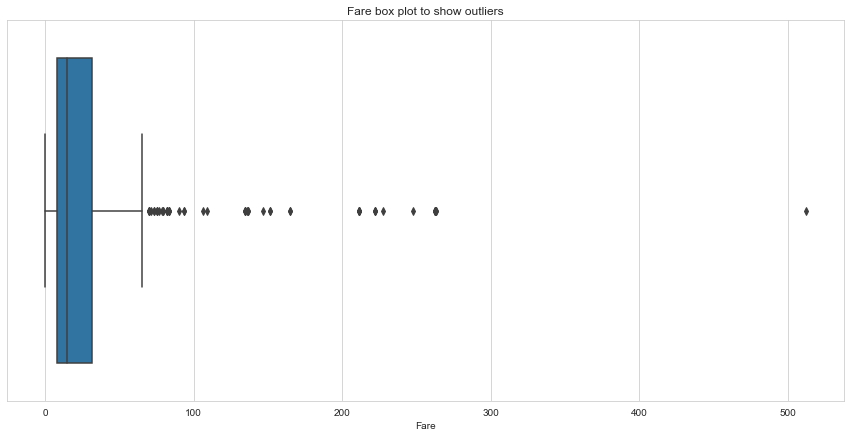

In [292]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='Fare')
plt.title('Fare box plot to show outliers')
plt.show()

In [293]:
q1=data['Fare'].quantile(0.25)
q3=data['Fare'].quantile(0.75)
IQR=q3-q1
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)
data=data[(data['Fare']>lb) & (data['Fare']<ub)]
print(ub)

66.9063


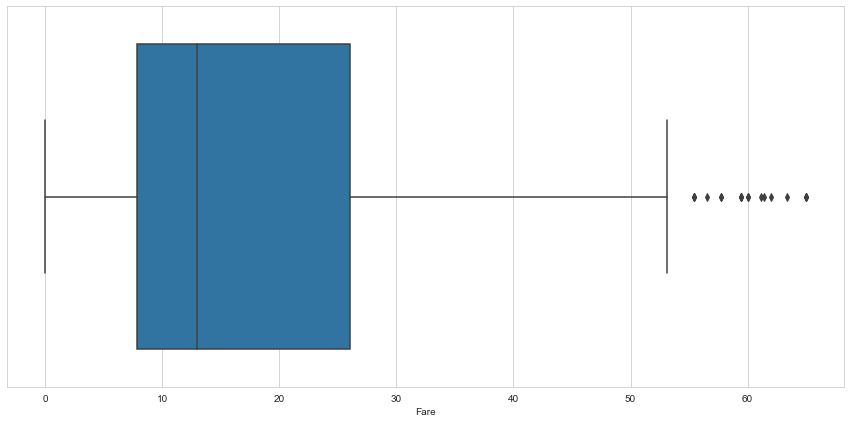

In [294]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='Fare')
plt.show()

In [295]:
data['Fare'].describe()

count    362.000000
mean      18.261763
std       14.368843
min        0.000000
25%        7.854200
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64

### Sex column

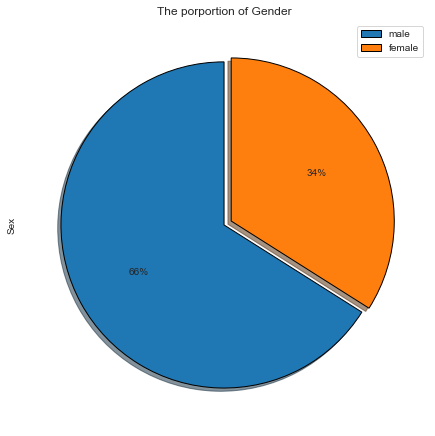

In [357]:
plt.figure(figsize=(7.5,7.5))
counts=data['Sex'].value_counts()
e=[0,0.05]
counts.plot(kind='pie',explode=e,shadow=True,wedgeprops={'edgecolor':'black'},autopct="%1.0f%%",startangle=90,labels=None)
plt.legend(labels=counts.index, loc='upper right')
plt.title("The porportion of Gender")
plt.show()

There are 34% females and 66% males

### Survived Column

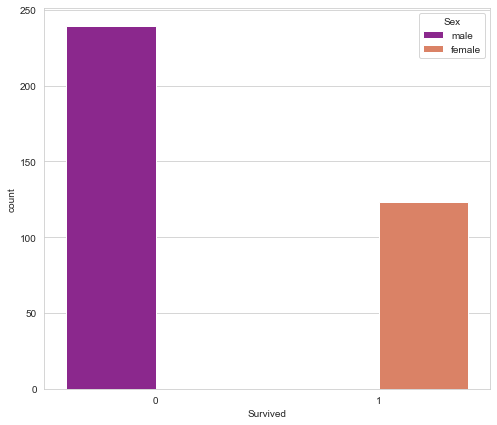

In [359]:
plt.figure(figsize=(8,7))
sns.countplot(data=data,x='Survived',palette='plasma',hue='Sex')
plt.show()

All Survived are females and their counts 125

### Age column 

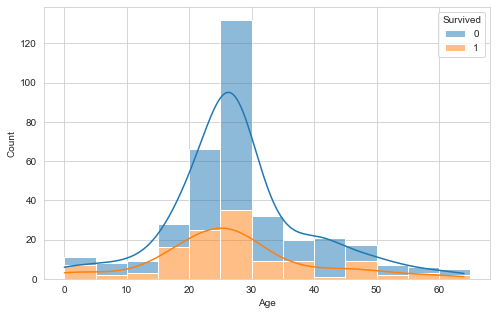

In [298]:

plt.figure(figsize=(8,5))
sns.histplot(data=data,x='Age',kde=True,binwidth=5,hue='Survived',multiple='stack')
plt.show()


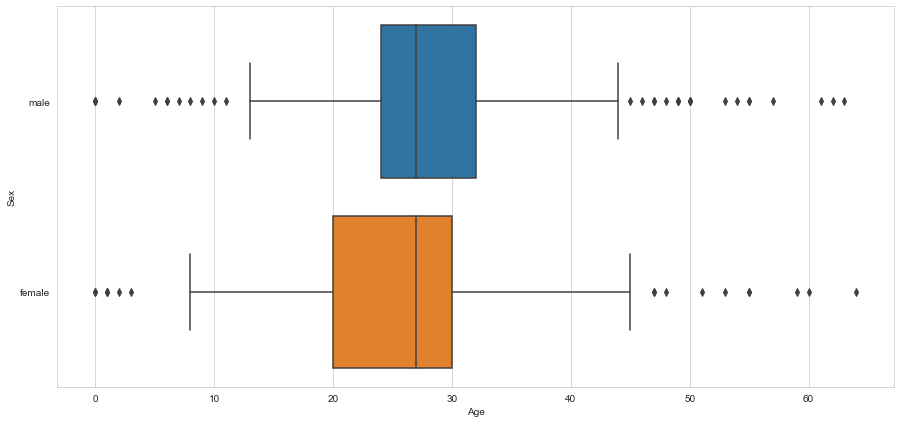

In [361]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='Age',y='Sex')
plt.show()


Females median of ages is 27 and 25% of them have 20 years and 75% have 30 years

Males median of ages is 27 and 25% of them have 25 years and 75% have 35 years

In [300]:
#Bining the age data 
bins=[0,3,15,35,50,data['Age'].max()]
label=['Baby','Children','Young','Elderly',"Old"]
data['Person']=pd.cut(data['Age'],bins=bins,labels=label,include_lowest=True)

### Person column 

In [301]:
data[['Age','Person']].head(10)

,Age,Person
0,34,Young
1,47,Elderly
2,62,Old
3,27,Young
4,22,Young
5,14,Children
6,30,Young
7,26,Young
8,18,Young
9,21,Young


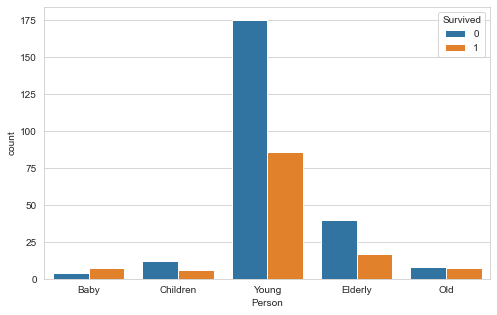

In [362]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(data=data,x='Person',hue='Survived')
plt.show()

Unsurvived more than survived in all age stages exept babies

In [303]:
data['Person'].value_counts()

Young       261
Elderly      57
Children     18
Old          15
Baby         11
Name: Person, dtype: int64

In [304]:
survy=data[(data['Survived']==1) & (data['Sex'].isin(['female']))]

In [305]:
person_counts=pd.crosstab(survy['Sex'],survy['Person'],values=survy['Survived'],aggfunc='count')
person_counts.head()

Person,Baby,Children,Young,Elderly,Old
Sex,,,,,
female,7,6,86,17,7


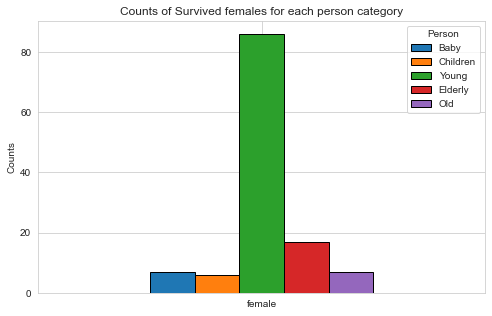

In [306]:
person_counts.plot(kind='bar',edgecolor='black',figsize=(8,5))
plt.title('Counts of Survived females for each person category')
plt.xlabel('')
plt.ylabel('Counts')
plt.xticks(rotation=None)
plt.show()

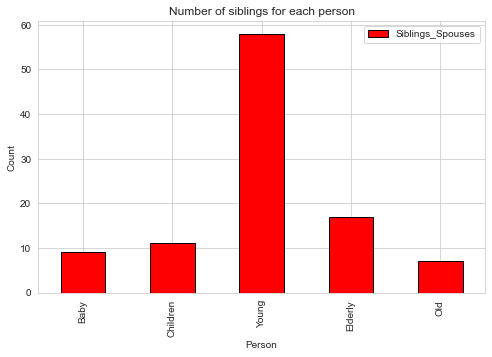

In [307]:

spiling_num=data[(data['Siblings_Spouses']>=1)]
spiling_num.groupby('Person')[['Siblings_Spouses']].count().plot(kind='bar',figsize=(8,5),color='r',edgecolor='black')
plt.title("Number of siblings for each person")
plt.ylabel("Count")
plt.show()

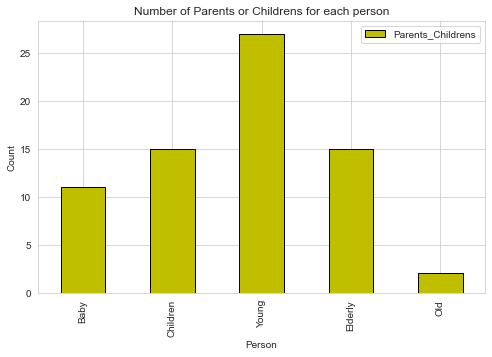

In [308]:
parch_num=data[(data['Parents_Childrens']>=1)]
parch_num.groupby('Person')[['Parents_Childrens']].count().plot(kind='bar',figsize=(8,5),color='y',edgecolor='black')
plt.title("Number of Parents or Childrens for each person")
plt.ylabel("Count")
plt.show()

### Embark column

In [309]:

data['Embarked']=data['Embarked'].str.replace('Q','Queenstown')
data['Embarked']=data['Embarked']=data['Embarked'].str.replace('C','Cherbourg')
data['Embarked']=data['Embarked'].str.replace('S','Southampton')

In [310]:
data['Embarked'].value_counts()

Southampton    246
Cherbourg       71
Queenstown      45
Name: Embarked, dtype: int64

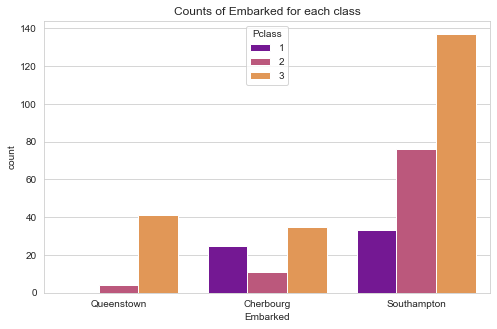

In [311]:
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='Embarked',order=['Queenstown','Cherbourg','Southampton'],hue='Pclass',palette='plasma')
plt.title('Counts of Embarked for each class')
plt.show()
print()

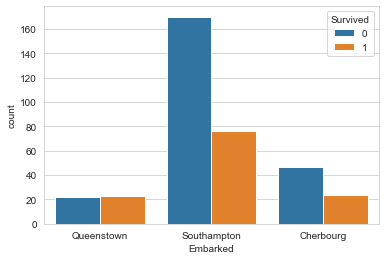

In [312]:
sns.countplot(data=data,x='Embarked',hue='Survived')
plt.show()

### Pclass column 

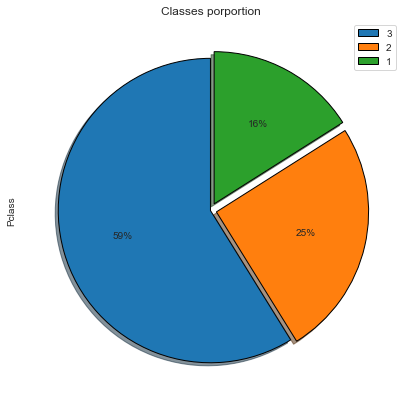

52% of shipe crewds on class 3


In [313]:

plt.figure(figsize=(7,7))
class_counts=data['Pclass'].value_counts()
e=[0,0.04,0.05]
class_counts.plot(kind='pie',explode=e,shadow=True,wedgeprops={'edgecolor':'black'},autopct="%1.0f%%",startangle=90,labels=None)
plt.legend(labels=class_counts.index, loc='upper right')
plt.title("Classes porportion")
plt.show()
print("52% of shipe crewds on class 3")

In [314]:
pvt=data.pivot_table(index='Embarked',columns='Pclass',values='Fare',aggfunc=['mean'])

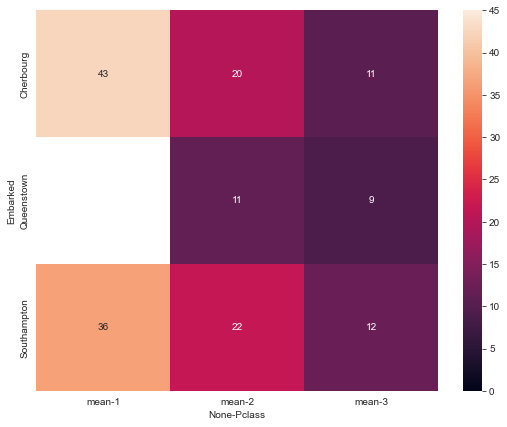

In [315]:
plt.figure(figsize=(9,7))
sns.heatmap(pvt,annot=True,vmin=0,vmax=45)
plt.show()

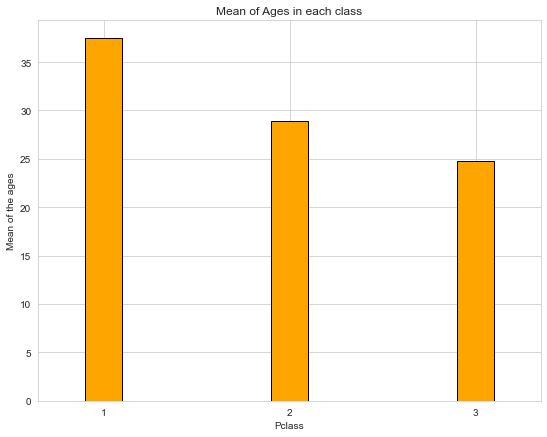

In [316]:
plt.figure(figsize=(9,7))
median_Pclass_age=data.groupby('Pclass')['Age'].mean()
median_Pclass_age.plot(kind='bar',color='orange',edgecolor='black',width=0.2)
plt.xticks(rotation=None)
plt.title("Mean of Ages in each class")
plt.ylabel("Mean of the ages")
plt.show()

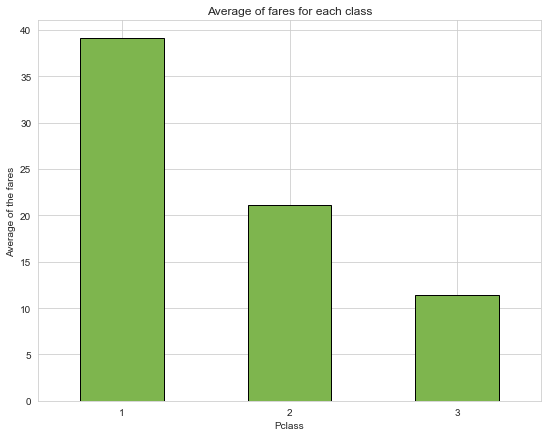

In [317]:
plt.figure(figsize=(9,7))
median_Pclass_age=data.groupby('Pclass')['Fare'].mean()
median_Pclass_age.plot(kind='bar',color='#7eb54e',edgecolor='black')
plt.xticks(rotation=None)
plt.title("Average of fares for each class")
plt.ylabel("Average of the fares")
plt.show()

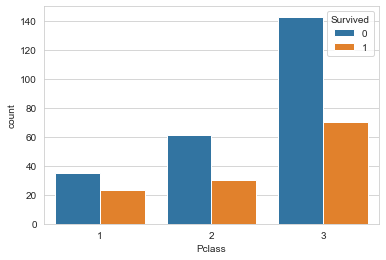

In [318]:
sns.countplot(data=data,x='Pclass',hue='Survived')
plt.show()

### Siblings_Spouses column

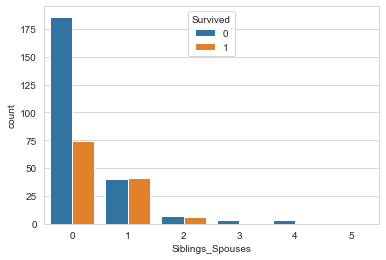

In [319]:
sns.countplot(data=data,x='Siblings_Spouses',hue='Survived')
plt.show()

### Parents_Childrens column

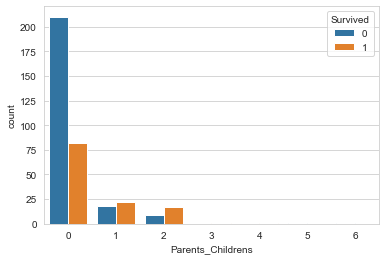

In [320]:
sns.countplot(data=data,x='Parents_Childrens',hue='Survived')
plt.show()

In [321]:
data['Parents_Childrens'].value_counts()

0    292
1     40
2     26
4      1
6      1
5      1
3      1
Name: Parents_Childrens, dtype: int64

### Ticket column

In [322]:
ticket=data['Ticket'].value_counts()
ticket[:20]

SOTON/O.Q. 3101315    3
C.A. 31029            3
347077                3
220845                3
2650                  2
C.A. 33112            2
2662                  2
C.A. 2315             2
W./C. 6607            2
13236                 2
315153                2
112378                2
A/5. 851              2
350405                2
F.C.C. 13534          2
CA 2144               2
CA 31352              2
2660                  2
29103                 2
347072                2
Name: Ticket, dtype: int64

In [323]:
group=list(ticket[ticket!=1].index)
alone=list(ticket[ticket==1].index)
group

['SOTON/O.Q. 3101315',
 'C.A. 31029',
 '347077',
 '220845',
 '2650',
 'C.A. 33112',
 '2662',
 'C.A. 2315',
 'W./C. 6607',
 '13236',
 '315153',
 '112378',
 'A/5. 851',
 '350405',
 'F.C.C. 13534',
 'CA 2144',
 'CA 31352',
 '2660',
 '29103',
 '347072',
 '11778',
 '230136',
 '13695',
 'C 4001',
 'S.O./P.P. 2',
 '28220',
 '24065']

In [324]:
data['Group']=data['Ticket'].isin(group)*1
data['Alone']=data['Ticket'].isin(alone)*1

In [325]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings_Spouses,Parents_Childrens,Ticket,Fare,Embarked,Person,Group,Alone
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Queenstown,Young,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,Southampton,Elderly,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Queenstown,Old,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,Southampton,Young,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,Southampton,Young,0,1
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.2250,Southampton,Children,0,1
6,898,1,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,Queenstown,Young,0,1
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29.0000,Southampton,Young,0,1
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,Cherbourg,Young,0,1
9,901,0,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.1500,Southampton,Young,0,1


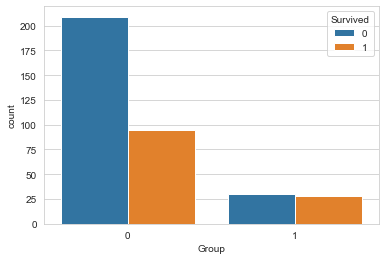

In [326]:
sns.countplot(data=data,x='Group',hue='Survived')
plt.show()

## Showing the correlation between columns 

In [327]:
data.corr()

,PassengerId,Survived,Pclass,Age,Siblings_Spouses,Parents_Childrens,Fare,Group,Alone
PassengerId,1.000000,-0.022051,-0.006851,-0.051025,-0.013057,0.019418,-0.016794,0.035422,-0.035422
Survived,-0.022051,1.000000,-0.043951,-0.067559,0.122106,0.202811,0.175613,0.131859,-0.131859
Pclass,-0.006851,-0.043951,1.000000,-0.394066,0.026585,0.064322,-0.684297,-0.048422,0.048422
Age,-0.051025,-0.067559,-0.394066,1.000000,-0.131477,-0.140112,0.203131,-0.074422,0.074422
Siblings_Spouses,-0.013057,0.122106,0.026585,-0.131477,1.000000,0.316820,0.305068,0.357674,-0.357674
Parents_Childrens,0.019418,0.202811,0.064322,-0.140112,0.316820,1.000000,0.303009,0.412629,-0.412629
Fare,-0.016794,0.175613,-0.684297,0.203131,0.305068,0.303009,1.000000,0.381226,-0.381226
Group,0.035422,0.131859,-0.048422,-0.074422,0.357674,0.412629,0.381226,1.000000,-1.000000
Alone,-0.035422,-0.131859,0.048422,0.074422,-0.357674,-0.412629,-0.381226,-1.000000,1.000000


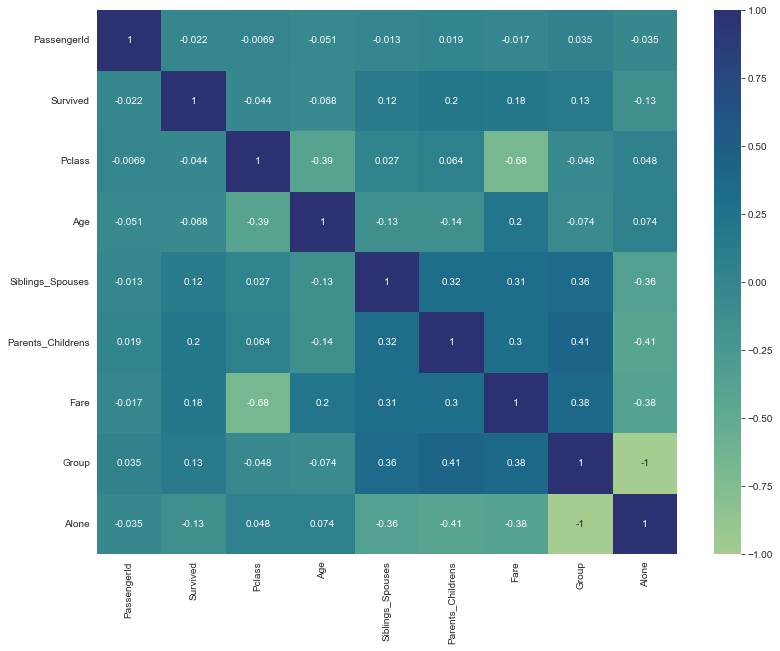

In [328]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap="crest")
plt.show()

# Data preprocessing

In [329]:

y=pd.DataFrame(data,columns=['Survived'])

In [330]:
final_data=data.drop(['PassengerId','Name','Siblings_Spouses','Parents_Childrens','Ticket','Person','Survived'],axis=1)

In [331]:
x=pd.get_dummies(data=final_data,columns=['Sex','Pclass','Embarked'], drop_first=True)

In [332]:

y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [333]:
x.head()

,Age,Fare,Group,Alone,Sex_male,Pclass_2,Pclass_3,Embarked_Queenstown,Embarked_Southampton
0,34,7.8292,0,1,1,0,1,1,0
1,47,7.0000,0,1,0,0,1,0,1
2,62,9.6875,0,1,1,1,0,1,0
3,27,8.6625,0,1,1,0,1,0,1
4,22,12.2875,0,1,0,0,1,0,1


In [334]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [335]:
x_train.shape

(253, 9)

In [336]:
x_test.shape

(109, 9)

# Training the model 

In [337]:
lr=LogisticRegression()

In [338]:

lr.fit(x_train,y_train)

LogisticRegression()

In [339]:
y_pred=lr.predict(x_train)

# Testing the model

In [346]:
y_pred=lr.predict(x_test)

In [348]:
accuracy_score(y_test,y_pred)

1.0

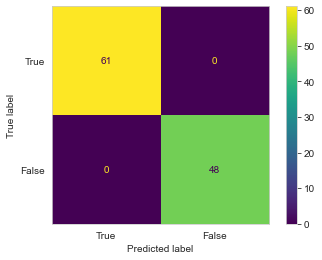

In [353]:

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[True,False])
cm_display.plot()
plt.grid(None)
plt.show()

In [355]:
print("The classification report :")
target_names = ['class 1','class 0']
print(classification_report(y_test, y_pred,target_names=target_names))

The classification report :
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        61
     class 0       1.00      1.00      1.00        48

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109

